In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
from IPython.display import Image, HTML
import math
from sklearn.linear_model import LinearRegression
import wget
import random
import csv
import json
import re


#import laUtilities as ut

%matplotlib inline

#import statsmodels.api as sm


In [11]:
def centerAxes(ax):
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    bounds = np.array([ax.axes.get_xlim(), ax.axes.get_ylim()])
    ax.plot(bounds[0][0],bounds[1][0],'')
    ax.plot(bounds[0][1],bounds[1][1],'')

In [ ]:
-10 + 20.0 * np.random.random(100)

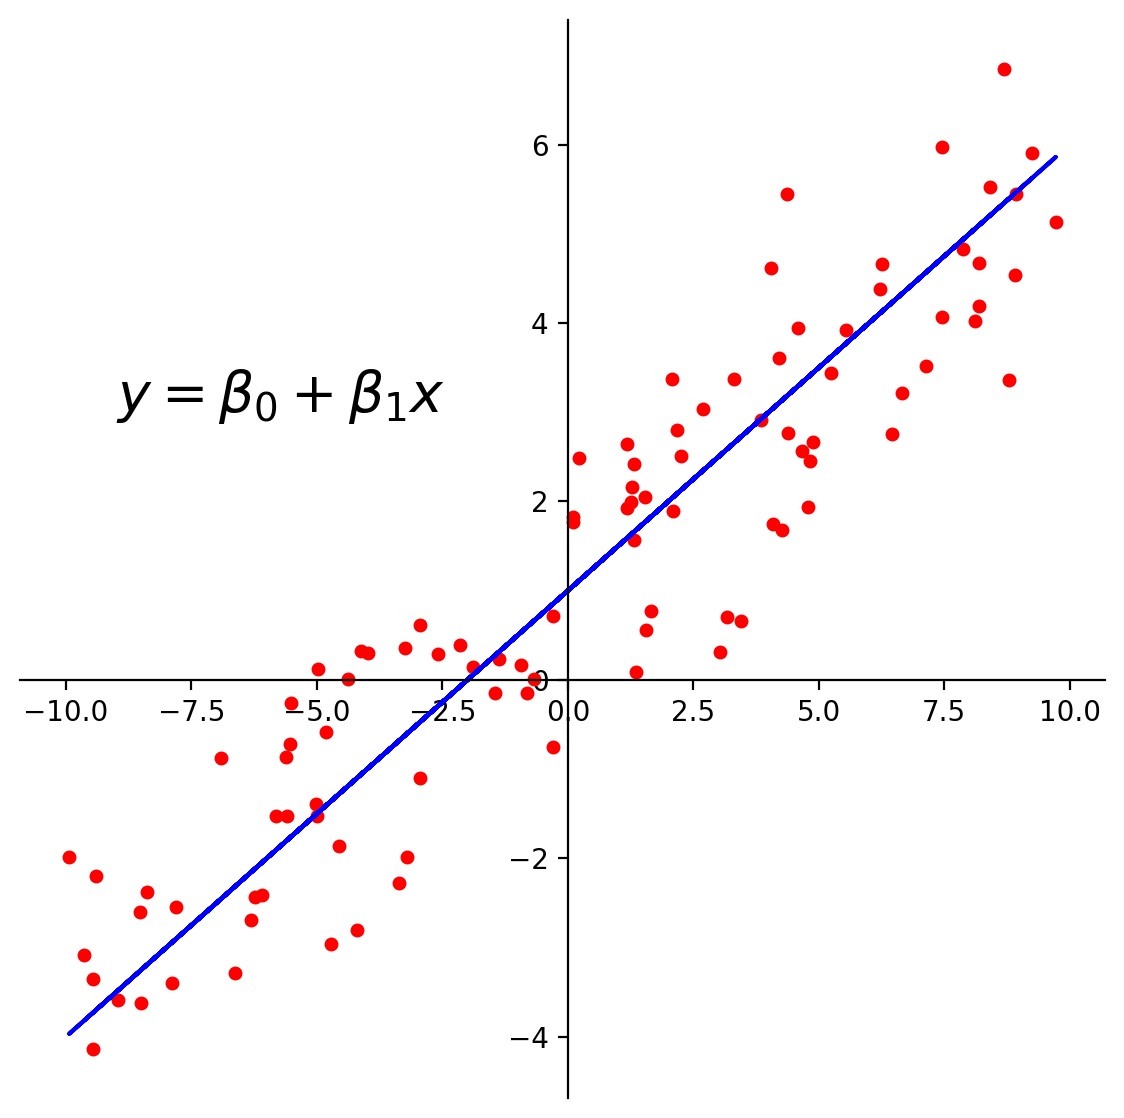

In [15]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0] + (line[1] * xlin) + np.random.randn(100)
ax.plot(xlin, ylin, 'ro', markersize = 4)
ax.plot(xlin, line[0] + line[1] * xlin, 'b-')
plt.text(-9, 3, r'$y = \beta_0 + \beta_1x$', size=20);

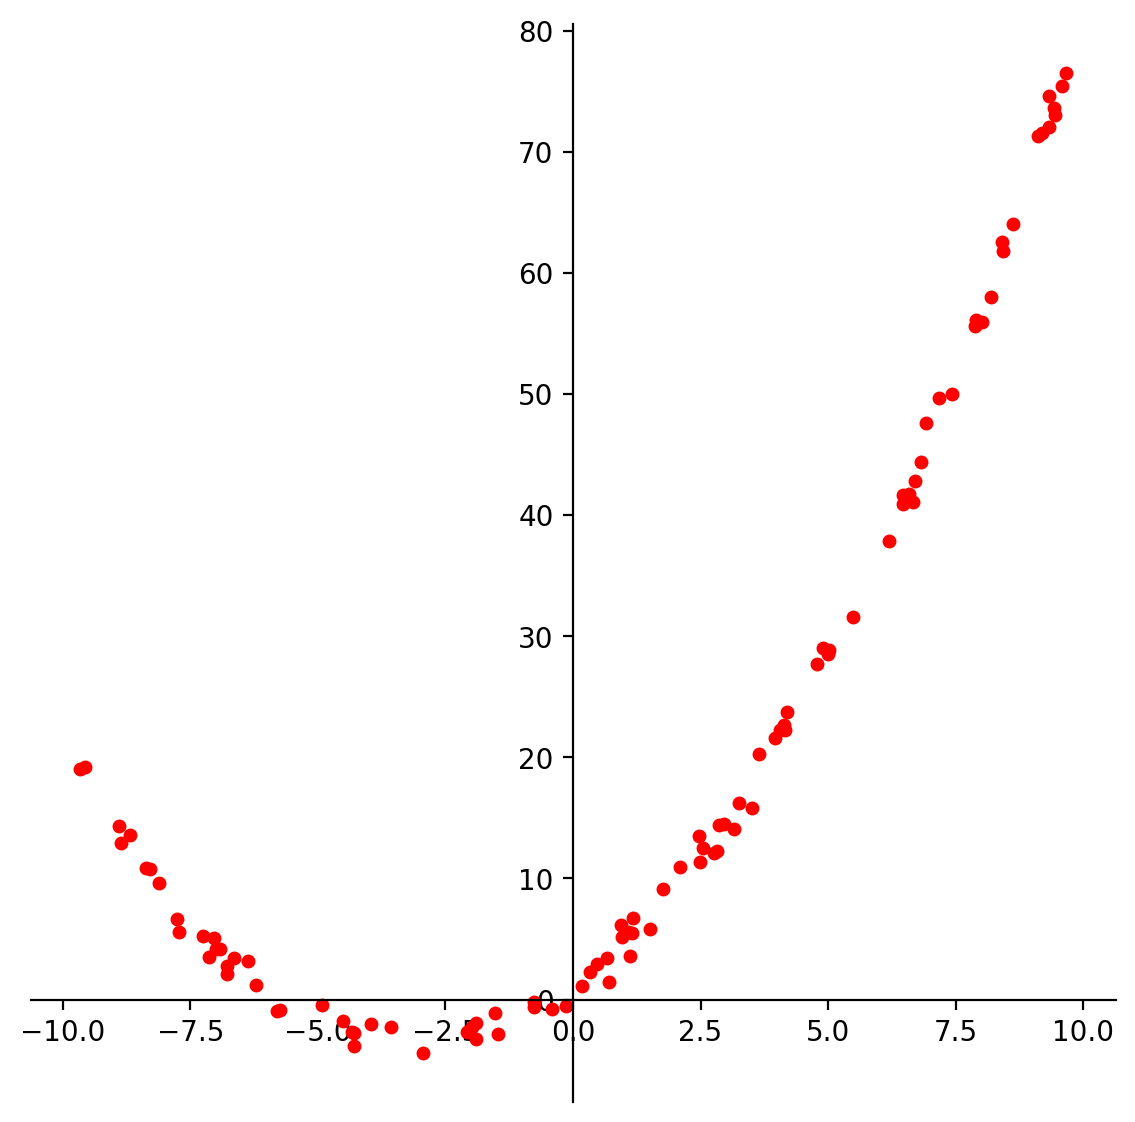

In [16]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
quad = np.array([1, 3, 0.5])
xquad = -10.0 + 20.0 * np.random.random(100)
yquad = quad[0] + (quad[1] * xquad) + (quad[2] * xquad * xquad) + np.random.randn(100)
ax.plot(xquad, yquad, 'ro', markersize = 4);

In [20]:
X_raw = list(range(6))
 
def wavy(x):
    return x + 2 + 0.1 * math.sin(10 * x)

In [23]:
X_raw

[0, 1, 2, 3, 4, 5]

Transform X_raw row vector into a column vector.

In [22]:
X = [[x] for x in X_raw]
X

[[0], [1], [2], [3], [4], [5]]

In [25]:
Y = [wavy(x) for x in X_raw]
Y

[2.0,
 2.9455978889110632,
 4.091294525072763,
 4.901196837590714,
 6.074511316047935,
 6.973762514629607]

In [ ]:
X_test = [v / 100 for v in range(501)]
X_test

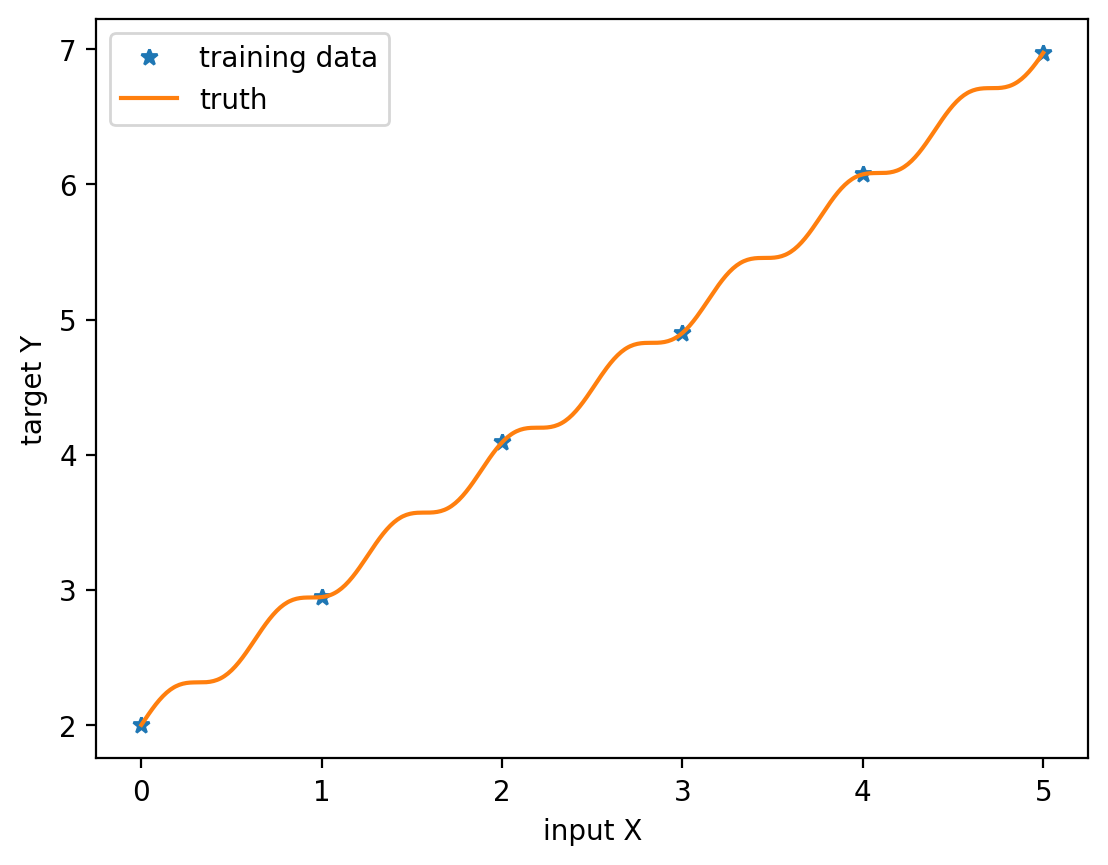

In [29]:
plt.plot(X, Y, "*", label="training data")
plt.plot(X_test, [wavy(x) for x in X_test], "-", label="truth")
plt.xlabel("input X")
plt.ylabel("target Y")
plt.legend()
plt.show()

In [33]:
coefficients_only = np.linalg.lstsq(X, Y, rcond=None)[0]
print(coefficients_only)
print(f"coefficients = {coefficients_only!r}")
print(f"model formula: y = {coefficients_only[0]}x")

[1.54542973]
coefficients = array([1.54542973])
model formula: y = 1.5454297325303366x


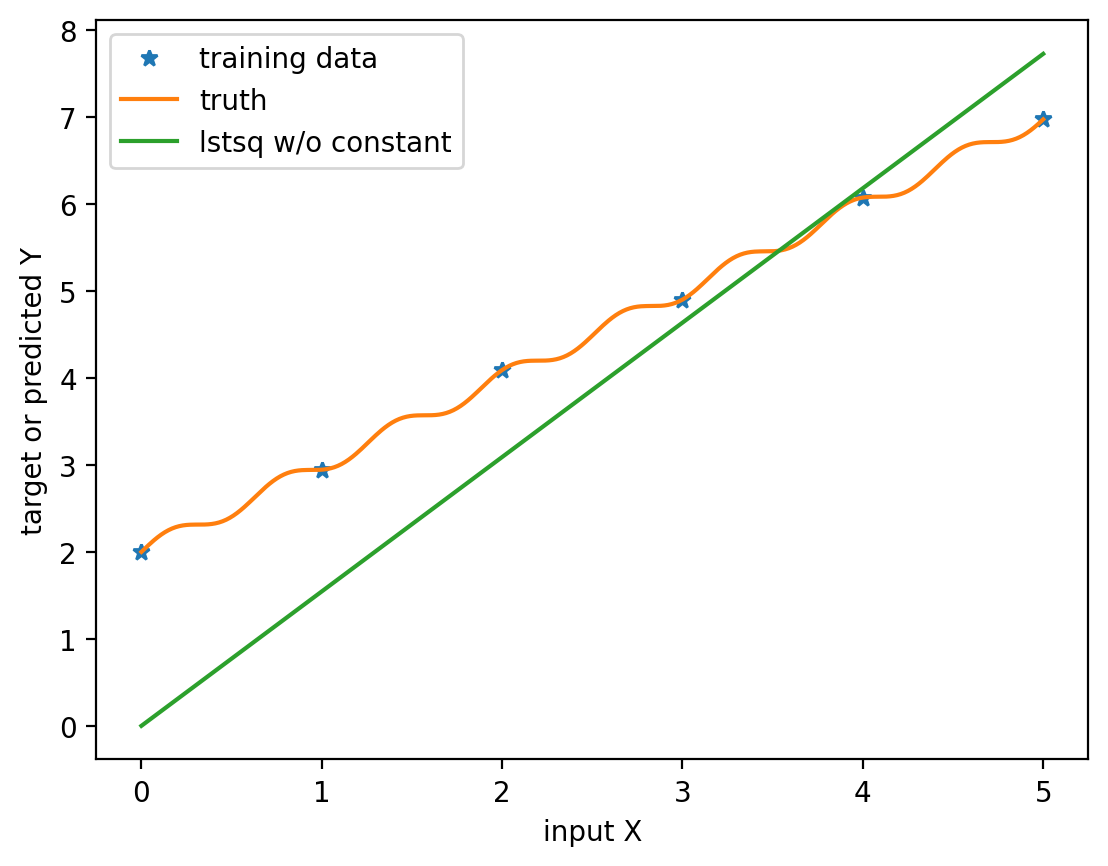

In [34]:
plt.plot([x[0] for x in X], Y, "*", label="training data")
plt.plot(X_test, [wavy(x) for x in X_test], "-", label="truth")
plt.plot(X_test, [v * coefficients_only[0] for v in X_test], label="lstsq w/o constant")
plt.xlabel("input X")
plt.ylabel("target or predicted Y")
plt.legend()
plt.show()

Code Example
This code shows how to run the regression with lstsq and the missing additive constant.

In [35]:
np.asarray(X)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [36]:

np.ones((len(X), 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [37]:
X_with_constant = np.hstack((X, np.ones((len(X), 1))))
X_with_constant

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.]])

coefficient and constant = array([1.00187015, 1.99305181])
model formula: y = 1.00187014763076x + 1.9930518112984463


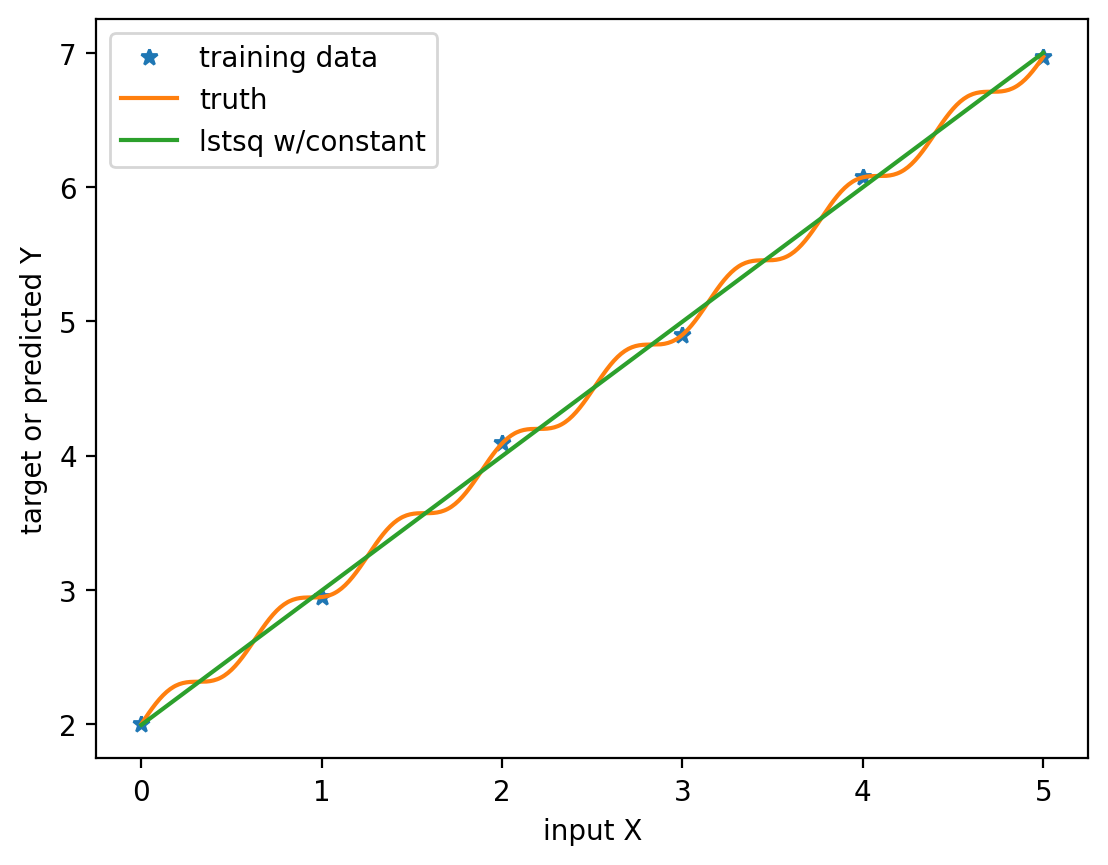

In [38]:
coefficient_and_constant = np.linalg.lstsq(X_with_constant, Y, rcond=None)[0]
print(f"coefficient and constant = {coefficient_and_constant!r}")
print(f"model formula: y = {coefficient_and_constant[0]}x + {coefficient_and_constant[1]}")
 
plt.plot([x[0] for x in X], Y, "*", label="training data")
plt.plot(X_test, [wavy(x) for x in X_test], "-", label="truth")
plt.plot(X_test, [v * coefficient_and_constant[0] + coefficient_and_constant[1] for v in X_test], label="lstsq w/constant")
plt.xlabel("input X")
plt.ylabel("target or predicted Y")
plt.legend()
plt.show()

#Code Example
This code uses scikit-learn’s LinearRegression class to run the same regression.

In [43]:
sk_model = LinearRegression()
sk_model.fit(X, Y)
print(f"coefficients = {sk_model.coef_!r}")
print(f"intercept = {sk_model.intercept_!r}")
print(f"model formula: y = {sk_model.coef_[0]}x + {sk_model.intercept_}")

coefficients = array([1.00187015])
intercept = np.float64(1.993051811298446)
model formula: y = 1.0018701476307603x + 1.993051811298446


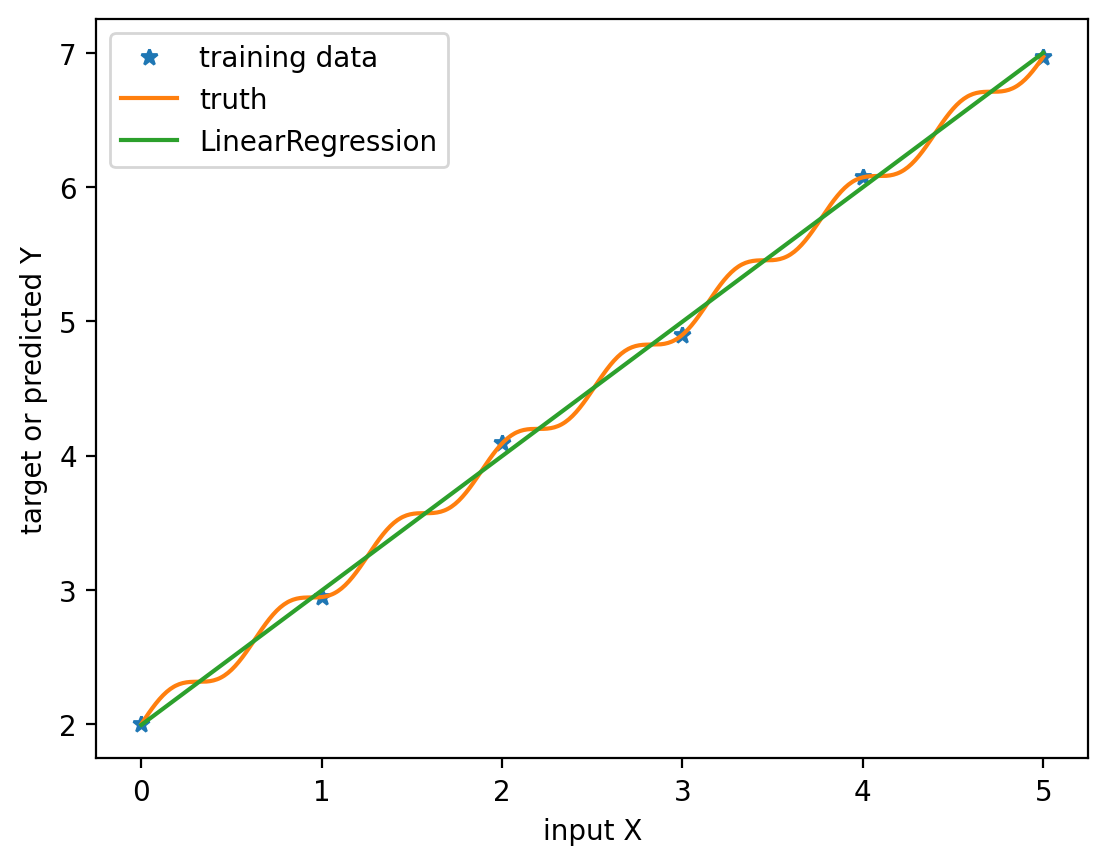

In [41]:
plt.plot([x[0] for x in X], Y, "*", label="training data")
plt.plot(X_test, [wavy(x) for x in X_test], "-", label="truth") 
plt.plot(X_test, sk_model.predict([[v] for v in X_test]), label="LinearRegression")
plt.xlabel("input X")
plt.ylabel("target or predicted Y")
plt.legend()
plt.show()

Downloading files in Jupyter: wget on Windows?

In [54]:
!python -m wget https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/mango-tiny.tsv


Saved under mango-tiny.tsv


In [55]:
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")
mango_data

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness,rated_flavor
0,1,5,4,0,4,4,5
1,1,5,5,1,5,5,1
2,2,4,3,1,3,3,3
3,3,3,2,0,2,1,2
4,5,1,1,1,1,1,1
5,4,2,1,1,1,1,1
6,5,1,1,1,2,1,1
7,3,3,2,1,2,2,2


In [58]:
X_mango = np.random.normal(3, 1, size=(100, 3))
print(X_mango)
print(X_mango.shape)

[[4.50954925 2.41183485 0.99599531]
 [3.55665225 3.07254    2.25685674]
 [4.58141104 3.62727925 2.60078901]
 [3.9958959  2.29783893 4.43610725]
 [3.10698144 2.75765639 2.01435621]
 [2.71671274 3.21428466 3.54898009]
 [3.95317309 3.28900751 3.92905348]
 [3.20043295 3.09829753 5.6647687 ]
 [1.35799209 4.50891686 2.46940626]
 [4.82080606 3.88775086 2.41928304]
 [4.53856817 2.8828515  4.21221779]
 [5.03720208 2.80776708 4.33358088]
 [3.66216    3.22294885 2.19962542]
 [4.45631393 4.43412047 2.95814937]
 [3.49330578 2.33703485 3.22806292]
 [2.66541222 4.40544348 2.13295257]
 [0.61471308 3.12240796 2.60082664]
 [1.66077717 4.69810157 1.8527152 ]
 [1.78282369 1.63430427 3.20224529]
 [3.34220924 3.20824285 2.32632828]
 [3.52698838 2.07515954 2.08944574]
 [3.86968689 3.4232341  3.09868867]
 [3.32334249 3.56003552 2.45211823]
 [4.02019092 1.97361357 1.90733352]
 [2.78216615 4.26157865 2.22588137]
 [2.07086956 3.9810976  1.80214649]
 [3.52857083 2.5542563  3.0309837 ]
 [4.65089715 1.94806462 3.16

In [61]:
Y_mango = X_mango.mean(axis=1) + np.random.normal(0, 1, size=(X_mango.shape[0],))
print(np.random.normal(0, 1, size=(X_mango.shape[0],)))
print(X_mango.mean(axis=1))
print(Y_mango)
print(Y_mango.shape)

[ 0.73239853 -0.55877085  2.25161115  0.55770704  0.58415654  0.79083487
  2.44079421  0.25390115  0.30550736 -0.2536631  -0.92703151  0.76190092
 -0.80263724 -1.94766336 -0.04359887 -1.06743655 -0.60863374 -0.39956735
  1.62674367 -0.39533319  0.5202347   0.08922379  0.63644806 -0.96256137
 -0.84939138 -0.67374646 -0.53272904  1.0505284  -0.2830062  -0.52096363
  0.18663457 -1.17643682 -0.02230066  0.59540456  1.67383189 -0.53412165
 -1.54699931  0.79078083 -0.3457637  -1.72535106  0.4046166  -0.74220264
 -0.6850375   0.25243083 -0.06683386 -0.2237982  -0.57785597 -0.71743116
 -1.99831158  0.37215874  0.43289891  0.60473331 -1.28649845 -0.20694929
  0.34910094  2.21473545  1.51096395  0.60822985 -0.13081671  0.9382812
  0.89801118  0.92630132 -1.76608718 -1.61596932  0.30692393  0.88046311
 -2.61856878 -2.61832732 -0.69995914  0.77602467  0.39408712  0.25940748
  0.94373253  0.02457818 -0.46312821 -0.7449757  -0.09446386  0.18177017
  0.35804941  0.46698868  0.25730545  1.59145975  0.

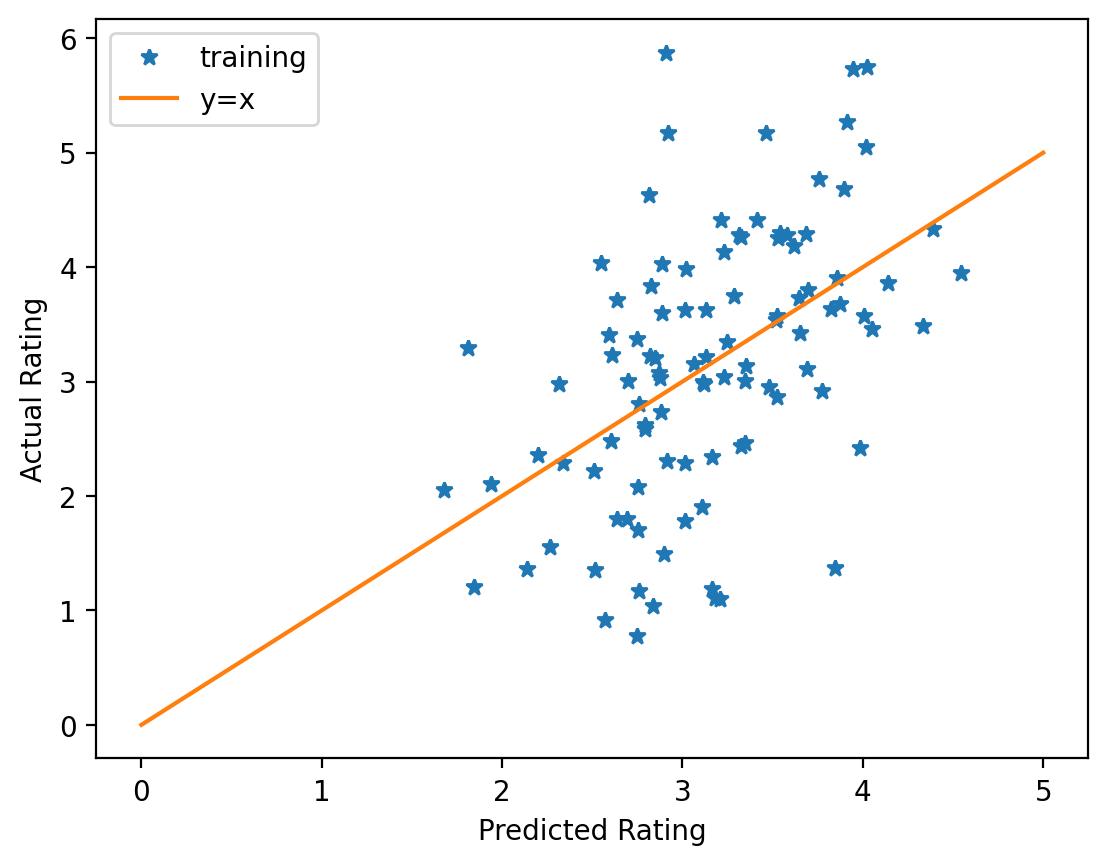

In [64]:
model_mango = LinearRegression()
model_mango.fit(X_mango, Y_mango)
Y_mango_predicted = model_mango.predict(X_mango)
 
plt.plot(Y_mango_predicted, Y_mango, "*", label="training")
plt.plot([0, 5], [0, 5], label="y=x")
plt.legend()
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.show()

Resampling in Python

In [66]:
X = [[1, 2], [3, 4], [5, 6]]

In [69]:
random.choice(X)

[5, 6]

In [71]:
random.choice(X)

[3, 4]

In [72]:
X = np.asarray(X)
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [81]:
q5 = list(mango_data["rated_flavor"])

In [82]:
q5

[5, 1, 3, 2, 1, 1, 1, 2]

In [84]:
occurrence = {item: q5.count(item) for item in q5}
occurrence

{5: 1, 1: 4, 3: 1, 2: 2}

In [85]:
{item: list(q5).count(item)/len(q5) for item in list(q5)}

{5: 0.125, 1: 0.5, 3: 0.125, 2: 0.25}

Find the dict item that has thehighest value

In [111]:
x = {1: 0.11, 2: 0.22, 3: 0.38, 4: 0.01, 5: 0.28}

In [112]:
d = [{k: v} for k, v in sorted(x.items(), key=lambda item: item[1])]

In [104]:
maxd = d[-1]

In [105]:
p8 = list(maxd.keys())[0]

In [106]:
p8

3

Alternative solution 

In [107]:
index = ([v for v in x.values()]).index(max([v for v in x.values()]))

In [108]:
maxd = [{k : v} for (k, v) in x.items()][index]

In [109]:
p8 = list(maxd.keys())[0]

In [110]:
p8

3

calculating perplexity

In [115]:
# First tokens from repeatedly prompting ChatGPT with
# "Tell me something interesting in 10 words or less."
q9_raw = [
    "Honey",
    "Octopuses",
    "Sharks",
    "Bananas",
    "A ",
    "Wombat",
    "A ",
    "Bees",
    "The ",
    "There's",
    "Cleopatra",
    "Venus ",
    "Hot ",
    "Humans ",
    "A "]

q9 = {}
for t in q9_raw:
    q9[t] = q9.get(t, 0) + 1 / len(q9_raw)

q9

{'Honey': 0.06666666666666667,
 'Octopuses': 0.06666666666666667,
 'Sharks': 0.06666666666666667,
 'Bananas': 0.06666666666666667,
 'A ': 0.2,
 'Wombat': 0.06666666666666667,
 'Bees': 0.06666666666666667,
 'The ': 0.06666666666666667,
 "There's": 0.06666666666666667,
 'Cleopatra': 0.06666666666666667,
 'Venus ': 0.06666666666666667,
 'Hot ': 0.06666666666666667,
 'Humans ': 0.06666666666666667}

In [118]:
s = sum([np.log(v) for v in q9.values()])

In [119]:
ave = s/len(q9)

In [120]:
ave

np.float64(-2.6235415635123553)

In [121]:
pp = np.exp(-ave)

In [122]:
pp

np.float64(13.784455765662985)

calculating entropy

In [124]:
q10 = {
    "robot uprising": 0.2,
    "politician uprising": 0.1,
    "it rains but only on Boston": 0.3,
    "the class votes for ghost peppers": 0.01,
    "a pretty normal day": 0.39,
}

In [125]:
p10 = -np.sum([v*np.log2(v) for v in q10.values()])

In [126]:
p10

np.float64(1.9139037172696836)

multi variable linear regression

In [127]:
mango_inputs = mango_data.drop("rated_flavor", axis=1)
mango_inputs

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness
0,1,5,4,0,4,4
1,1,5,5,1,5,5
2,2,4,3,1,3,3
3,3,3,2,0,2,1
4,5,1,1,1,1,1
5,4,2,1,1,1,1
6,5,1,1,1,2,1
7,3,3,2,1,2,2


In [128]:
def coef(col):
    X = np.asarray(mango_inputs[col]).reshape(-1, 1)
    Y = np.asarray(mango_data["rated_flavor"]).reshape(-1, 1)
    sk_model = LinearRegression()
    sk_model.fit(X, Y)
    # print(f"coefficients = {sk_model.coef_!r}")
    # print(f"intercept = {sk_model.intercept_!r}")
    # print(f"model formula: y = {sk_model.coef_[0]}x + {sk_model.intercept_}")
    return sk_model.coef_[0]

In [129]:
c = mango_inputs.columns

In [142]:
c

Index(['green_rating', 'yellow_rating', 'softness', 'wrinkles',
       'estimated_flavor', 'estimated_sweetness'],
      dtype='object')

In [140]:
c[0]

'green_rating'

In [141]:
high_coef = [coef(item)[0] for item in c]

In [143]:
high_coef

[np.float64(-0.5555555555555557),
 np.float64(0.5555555555555557),
 np.float64(0.4409448818897636),
 np.float64(-1.9999999999999996),
 np.float64(0.42857142857142866),
 np.float64(0.4)]

In [145]:
maxx = c[high_coef.index(max(high_coef))]

In [146]:
maxx

'yellow_rating'

Random selection of key based on probability 

In [159]:
d = {"one": 5, "two": 1, "three": 25, "four": 14}
keys = list(d.keys())
values = list(d.values())
random_key = random.choices(keys, weights=values)

print(random_key)

['three']


In [216]:
def p14():
    d = {"You win": .1, "Sorry": .9}
    keys = list(d.keys())
    values = list(d.values())
    random_key = random.choices(keys, weights=values)

    return random_key

In [220]:
p14()

['Sorry']

In [226]:
[p14() for i in range(10)]

[['Sorry'],
 ['Sorry'],
 ['Sorry'],
 ['Sorry'],
 ['You win'],
 ['Sorry'],
 ['Sorry'],
 ['Sorry'],
 ['You win'],
 ['Sorry']]

Bootstrap samples

In [228]:
q15 = [0.44526842059338856, 0.6415977178857716, 0.9143457208633793, 0.040810075507440646, 0.6910270489830476, 0.10835956174140715, 0.5831891761086495, 0.24071332159738457, 0.2276135670886662, 0.0187843711518334]

In [229]:
def p15(data):
    return np.random.choice(data, size=len(data), replace=True)

In [230]:
[p15(q15) for i in range(10)]

[array([0.69102705, 0.24071332, 0.64159772, 0.04081008, 0.04081008,
        0.64159772, 0.69102705, 0.22761357, 0.01878437, 0.22761357]),
 array([0.44526842, 0.91434572, 0.58318918, 0.44526842, 0.44526842,
        0.22761357, 0.24071332, 0.58318918, 0.22761357, 0.91434572]),
 array([0.22761357, 0.04081008, 0.69102705, 0.91434572, 0.58318918,
        0.91434572, 0.22761357, 0.44526842, 0.10835956, 0.69102705]),
 array([0.01878437, 0.22761357, 0.10835956, 0.91434572, 0.44526842,
        0.24071332, 0.22761357, 0.24071332, 0.64159772, 0.91434572]),
 array([0.91434572, 0.10835956, 0.91434572, 0.44526842, 0.58318918,
        0.01878437, 0.10835956, 0.01878437, 0.91434572, 0.91434572]),
 array([0.04081008, 0.22761357, 0.04081008, 0.04081008, 0.44526842,
        0.44526842, 0.01878437, 0.22761357, 0.01878437, 0.64159772]),
 array([0.04081008, 0.10835956, 0.91434572, 0.64159772, 0.10835956,
        0.04081008, 0.44526842, 0.22761357, 0.44526842, 0.22761357]),
 array([0.58318918, 0.01878437, 0.

calculating variance

In [231]:
q18_raw = [
    1,
    1,
    1,
    2,
    2,
    2,
    3,
    3,
    3,
    3,
    3,
    3,
    4,
    5,
    5,
    5,
    6,
    6,
    6,
    6
]

In [232]:
def q18():
    return random.choice(q18_raw)

In [240]:
num = q18()

In [241]:
num

6

In [243]:
X_mango = np.random.normal(3, 1, size=(100, 3))

In [244]:
X_mango

array([[ 1.30405328,  6.01706776,  4.19379966],
       [ 0.65872901,  3.35266515,  1.35973368],
       [ 2.62063463,  1.15901222,  2.73287452],
       [ 1.91347763,  1.78377739,  3.21173905],
       [ 3.83086176,  4.78034879,  1.40982059],
       [ 5.30095855,  1.65895564,  3.42205877],
       [ 2.0275787 ,  2.30347437,  1.01688411],
       [ 2.06714305,  3.0021808 ,  3.22295637],
       [ 1.55692638,  4.74404368,  2.97550198],
       [ 2.78118247,  3.17994822,  2.6634184 ],
       [ 3.13327388,  2.62305201,  3.21960758],
       [ 3.28147674,  3.88482686,  3.25814332],
       [ 3.0466871 , -0.18955785,  2.27855108],
       [ 2.28000289,  2.91933565,  3.48442932],
       [ 2.54531417,  3.33378547,  1.3873142 ],
       [ 2.48636726,  2.72440894,  2.37305322],
       [ 3.36083092,  2.23496486,  3.04694663],
       [ 1.47764189,  0.68122324,  2.95693867],
       [ 3.75089284,  1.69432044,  3.36790755],
       [ 1.8854695 ,  2.10020733,  3.21601247],
       [ 1.78942962,  2.12497078,  4.017

In [245]:
q20x = np.array([[0.2, 0.3],
                 [0.4, 0.3],
                 [0.3, 0.4],
                 [0.35, 0.45],
                 [0.6, 0.4],
                 [0.3, 0.9],
                 [0.13, 0.99],
                 [0.8, 0.5],
                 [0.9, 0.92],
                 [0.98, 0.95]])

q20y = np.array([0.2, 0.3, 0.4, 0.3, 0.5, 0.6, 0.5, 0.8, 0.9, 0.1])

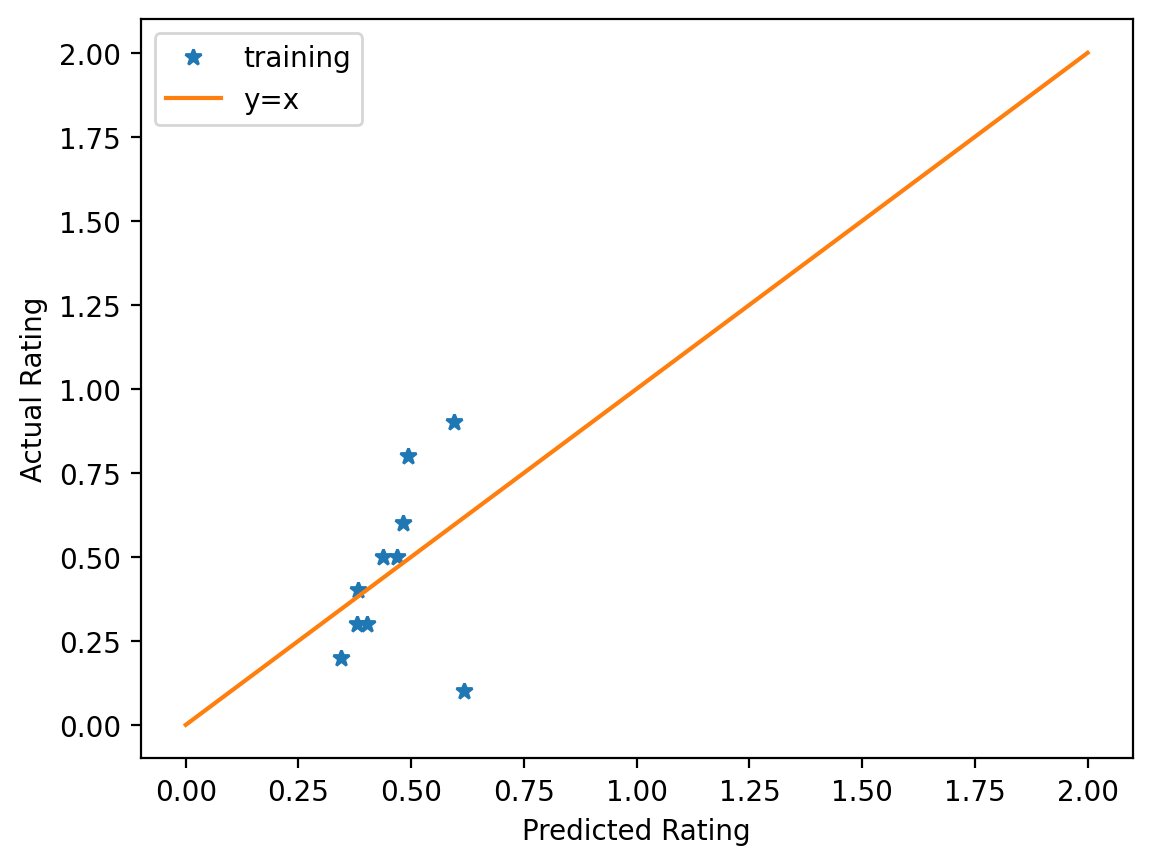

In [247]:
model_q = LinearRegression()
model_q.fit(q20x, q20y)
Y_q20y_predicted = model_q.predict(q20x)
 
plt.plot(Y_q20y_predicted, q20y, "*", label="training")
plt.plot([0, 2], [0, 2], label="y=x")
plt.legend()
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.show()

Code Example: Reading Lines from a File
The following example code reads all the lines of a file at once and returns them in a list.



In [ ]:
def read_file_at_once(filename):
    output = []
    with open(filename) as fp:
        for line in fp:
            output.append(line)
 
    return output

Code Example: Reading Lines with a Generator


In [ ]:
def read_file_with_generator(filename):
    with open(filename) as fp:
        for line in fp:
            yield line

Code Example: Reading a TSV File into Dictionaries
Here is another example of reading a tab-separated file with a header and yielding the contents as dictionaries. This version requires a header row in the file.


In [ ]:

def read_tsv_dictionaries(filename):
    with open(filename) as fp:
        def parse_line(line):
            return line.rstrip("\n").split("\t")
 
        header = parse_line(next(fp))
        for line in fp:
            line = parse_line(line)
            yield dict(zip(header, line))

Code Example: Writing a TSV File in Python
Here is a function to write a simple TSV file. It takes in the target filename, a sequence of column_names for the header, and a sequence of rows of data with each row being a sequence.


In [ ]:

def write_tsv(filename, column_names, rows):
    with open(filename, "w") as fp:
        def write_line(row):
            fp.write("\t".join(str(v) for v in row) + "\n")
 
        write_line(column_names)
        for row in rows:
            write_line(row)

Code Example: Reading a CSV File with the CSV Module


In [ ]:
import csv
def read_csv_lists(filename):
    with open(filename) as file:
        reader = csv.reader(file)
        for row in reader:
            yield row

Code Example: Reading a CSV File into Dictionaries
Here is another version of the file reading code that returns dictionaries instead of lists. Note how brief the change is; this is a common pattern that they wanted to be easy to express.



In [ ]:
import csv
def read_csv_dictionaries():
    with open(filename) as file:
        reader = csv.DictReader(file)
        for row in reader:
            yield row

Code Example: Reading TSV Files with the CSV Module
Here is an example of using those options to read a TSV file using the CSV module.



In [ ]:
import csv
 
def read_tsv_dictionaries_2():
    with open(filename) as file:
        reader = csv.DictReader(file, dialect="excel-tab")
        for row in reader:
            yield row

Code Example: Handling Different Data Types
We will wrap up this example with a more full-featured parser that handles numeric types too. It will try to convert all fields except "mango_id" into numbers and set the value to None if the parsing fails. None will not be a good input to most modeling code, but you will have to separately decide what to do in those cases.



In [ ]:
import csv
 
def read_mango_data(filename):
    with open(filename) as file:
        reader = csv.DictReader(file, dialect="excel-tab")
        for row in reader:
            for column_name in row:
                if column_name != "mango_id":
                    try:
                        row[column_name] = float(row[column_name])
                    except:
                        row[column_name] = None
 
            yield row

strings split

In [250]:
q2 = "35,Hello,red,153.2,n/a,true,true,true,false,154,92,2024-09-01,2020-03-06,confirmed,n/a,F,100,100\n"

In [257]:
s = re.split(",|\n|''", q2)

In [258]:
print(s)

['35', 'Hello', 'red', '153.2', 'n/a', 'true', 'true', 'true', 'false', '154', '92', '2024-09-01', '2020-03-06', 'confirmed', 'n/a', 'F', '100', '100', '']


In [269]:
def read_tsv_as_dicts(file_n):
    with open(file_n) as file:
        reader = csv.DictReader(file, delimiter='\t')
        for row in reader:
            parsed_row = {}
            for key, value in row.items():
                try:
                    parsed_row[key] = int(value)
                except ValueError:
                    parsed_row[key] = None
            yield parsed_row
    for row in parsed_row:
        return row

# Example usage


In [270]:
list(read_tsv_as_dicts('mango-tiny.tsv'))

[{'green_rating': 1,
  'yellow_rating': 5,
  'softness': 4,
  'wrinkles': 0,
  'estimated_flavor': 4,
  'estimated_sweetness': 4,
  'rated_flavor': 5},
 {'green_rating': 1,
  'yellow_rating': 5,
  'softness': 5,
  'wrinkles': 1,
  'estimated_flavor': 5,
  'estimated_sweetness': 5,
  'rated_flavor': 1},
 {'green_rating': 2,
  'yellow_rating': 4,
  'softness': 3,
  'wrinkles': 1,
  'estimated_flavor': 3,
  'estimated_sweetness': 3,
  'rated_flavor': 3},
 {'green_rating': 3,
  'yellow_rating': 3,
  'softness': 2,
  'wrinkles': 0,
  'estimated_flavor': 2,
  'estimated_sweetness': 1,
  'rated_flavor': 2},
 {'green_rating': 5,
  'yellow_rating': 1,
  'softness': 1,
  'wrinkles': 1,
  'estimated_flavor': 1,
  'estimated_sweetness': 1,
  'rated_flavor': 1},
 {'green_rating': 4,
  'yellow_rating': 2,
  'softness': 1,
  'wrinkles': 1,
  'estimated_flavor': 1,
  'estimated_sweetness': 1,
  'rated_flavor': 1},
 {'green_rating': 5,
  'yellow_rating': 1,
  'softness': 1,
  'wrinkles': 1,
  'estimate

write a function that takes in a file name and argument, reads it as a TSV with a header row, and returns an iterator of dictionaries. Each value should be parsed as an integer. If a value does not parse successfully, set the value to 5. In addition add a new key "boss" to each dictionary with value True if any value did not perse successfully, and False otherwise.

In [10]:
def read_tsv_as_dicts(file_name):
    with open(file_name, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file, delimiter='\t')
        for row in reader:
            parsed_row = {}
            parse_failed = False
            for key, value in row.items():
                try:
                    parsed_row[key] = int(value)
                except ValueError:
                    parsed_row[key] = 5
                    parse_failed = True
            parsed_row["boss"] = parse_failed
            yield parsed_row

# Example usage
    for row in parsed_row:
        return row

In [11]:
list(read_tsv_as_dicts("mango-tiny.tsv"))

[{'green_rating': 1,
  'yellow_rating': 5,
  'softness': 4,
  'wrinkles': 0,
  'estimated_flavor': 4,
  'estimated_sweetness': 4,
  'rated_flavor': 5,
  'boss': False},
 {'green_rating': 1,
  'yellow_rating': 5,
  'softness': 5,
  'wrinkles': 1,
  'estimated_flavor': 5,
  'estimated_sweetness': 5,
  'rated_flavor': 1,
  'boss': False},
 {'green_rating': 2,
  'yellow_rating': 4,
  'softness': 3,
  'wrinkles': 1,
  'estimated_flavor': 3,
  'estimated_sweetness': 3,
  'rated_flavor': 3,
  'boss': False},
 {'green_rating': 3,
  'yellow_rating': 3,
  'softness': 2,
  'wrinkles': 0,
  'estimated_flavor': 2,
  'estimated_sweetness': 1,
  'rated_flavor': 2,
  'boss': False},
 {'green_rating': 5,
  'yellow_rating': 1,
  'softness': 1,
  'wrinkles': 1,
  'estimated_flavor': 1,
  'estimated_sweetness': 1,
  'rated_flavor': 1,
  'boss': False},
 {'green_rating': 4,
  'yellow_rating': 2,
  'softness': 1,
  'wrinkles': 1,
  'estimated_flavor': 1,
  'estimated_sweetness': 1,
  'rated_flavor': 1,
  'b

write a function that takes in three inputs - an input file name "file_in", and output file name "file_out", and a list of three columns "col_1', "col_2" and "col_3". The function should read the input file using TSV format and write the output file using TSV format with just the soecified column names. The ouput should have the column names in the same order as the input column name list.

In [12]:
def filter_tsv_columns(file_in, file_out, columns):
    with open(file_in, mode='r', encoding='utf-8') as infile, open(file_out, mode='w', encoding='utf-8', newline='') as outfile:
        reader = csv.DictReader(infile, delimiter='\t')
        writer = csv.DictWriter(outfile, fieldnames=columns, delimiter='\t')
        
        # Write the header row
        writer.writeheader()
        
        # Write the filtered rows
        for row in reader:
            filtered_row = {col: row[col] for col in columns}
            writer.writerow(filtered_row)



In [13]:
# Example usage
file_in = 'mango-tiny.tsv'
file_out = 'mango_output.tsv'
columns = ['green_rating', 'wrinkles', 'rated_flavor']
filter_tsv_columns(file_in, file_out, columns)

write a function that takes in a filename as argument, reads it as a TSV with a header row, and returns the number of rows with data.

In [ ]:
def count_data_rows(file_name):
    with open(file_name, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file, delimiter='\t')
        # Skip the header row
        next(reader)
        # Count the number of rows with data
        row_count = sum(1 for row in reader if any(row))
    return row_count

# Example usage
file_name = 'example.tsv'
print(f"Number of rows with data: {count_data_rows(file_name)}")

write a function that takes in a filename as argument, and returns True if the file is formated as TSV and Flase otherwise.

In [ ]:
def is_tsv(filename):
    try:
        with open(filename, 'r') as file:
            for line in file:
                if '\t' not in line:
                    return False
            return True
    except Exception as e:
        print(f"An error occurred: {e}")
        return False

# Example usage:
# print(is_tsv('example.tsv'))


the following "30.44,foh,foo,bar,0.08\n" is read from a CSV file. Set a to the floating point number in the first column.

In [ ]:
csv_line = "30.44,foh,foo,bar,0.08\n"
a = float(csv_line.split(',')[0])
print(a)  # Output: 30.44


write a function that takes in a filename as argument, reads it as CSV with a hearder row, and returns the list of column names. The list of columns should be in the same order as the colmns in the file.

In [ ]:

def get_column_names(filename):
    try:
        with open(filename, 'r') as file:
            reader = csv.reader(file)
            column_names = next(reader)  # Read the header row
            return column_names
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Example usage:
# column_names = get_column_names('example.csv')
# print(column_names)


write a function that takes in a filename and column name, parses the file as CSV with header row, and retruns a list of values in the given column. If the column is missing the function should return a KeyError.

In [ ]:

def get_column_values(filename, column_name):
    try:
        with open(filename, 'r') as file:
            reader = csv.DictReader(file)
            if column_name not in reader.fieldnames:
                raise KeyError(f"Column '{column_name}' not found in the file.")
            return [row[column_name] for row in reader]
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Example usage:
# values = get_column_values('example.csv', 'desired_column')
# print(values)


write a function that takes in a filename and a string key, parses the file as JSON, and returns the value of the key. If the object in the JSON file is not a dictionary, or the given key does not exist, then the function should return None.

In [ ]:
import json

def get_value_from_json(filename, key):
    try:
        with open(filename, 'r') as file:
            data = json.load(file)
            if isinstance(data, dict):
                return data.get(key, None)
            else:
                return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
# value = get_value_from_json('example.json', 'desired_key')
# print(value)


write a function that takes in a filename, parses the file as TSV with header row,and returns a dictionary with the average value of each coolmn.

In [ ]:
import csv

def calculate_column_averages(filename):
    try:
        with open(filename, 'r') as file:
            reader = csv.DictReader(file, delimiter='\t')
            column_sums = {}
            column_counts = {}
            
            for row in reader:
                for column, value in row.items():
                    try:
                        value = float(value)
                        if column in column_sums:
                            column_sums[column] += value
                            column_counts[column] += 1
                        else:
                            column_sums[column] = value
                            column_counts[column] = 1
                    except ValueError:
                        # Skip non-numeric values
                        continue
            
            column_averages = {column: column_sums[column] / column_counts[column] for column in column_sums}
            return column_averages
    except Exception as e:
        print(f"An error occurred: {e}")
        return {}

# Example usage:
# averages = calculate_column_averages('example.tsv')
# print(averages)


write a function that takes in a filename and a list of column names, parses the file as CSV, and returns True if all the given columns are in the file, and False otherwise.

In [ ]:
import csv

def check_columns_in_csv(filename, columns):
    try:
        with open(filename, 'r') as file:
            reader = csv.DictReader(file)
            file_columns = reader.fieldnames
            return all(column in file_columns for column in columns)
    except Exception as e:
        print(f"An error occurred: {e}")
        return False

# Example usage:
# columns_to_check = ['column1', 'column2', 'column3']
# result = check_columns_in_csv('example.csv', columns_to_check)
# print(result)  # Output: True or False


write a function that takes in a filename and column name and a test value as arguments. Parses the file as TSV and returns the first row where the value is equal to the test value. The row should should be returned as a dictionary. If no such row exists, return None.

In [ ]:
import csv

def find_row_in_tsv(filename, column_name, column_value):
    try:
        with open(filename, 'r') as file:
            reader = csv.DictReader(file, delimiter='\t')
            for row in reader:
                if row[column_name] == column_value:
                    return row
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
# result = find_row_in_tsv('example.tsv', 'desired_column', 'desired_value')
# print(result)


In [ ]:
import csv

def find_row_in_tsv(filename, column_name, column_value):
    try:
        with open(filename, 'r') as file:
            reader = csv.DictReader(file, delimiter='\t')
            for row in reader:
                if row[column_name] == column_value:
                    return row
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
# result = find_row_in_tsv('example.tsv', 'desired_column', 'desired_value')
# print(result)


use a string method to separate the fields in "35,Hello,red,153.2,n/a,true,true,true,false,154,92,2024-09-01,2020-03-06,confirmed,n/a,F,100,100\n"

In [14]:
data = "35,Hello,red,153.2,n/a,true,true,true,false,154,92,2024-09-01,2020-03-06,confirmed,n/a,F,100,100\n"
fields = data.strip().split(',')
print(fields)


['35', 'Hello', 'red', '153.2', 'n/a', 'true', 'true', 'true', 'false', '154', '92', '2024-09-01', '2020-03-06', 'confirmed', 'n/a', 'F', '100', '100']


In [15]:
len(fields)

18

write a function that takes in a filename as argument, reads it as a TSV with a header row, check each row to see if they have data or they're blank, and returns only the number of rows that have data.

In [ ]:
import csv

def count_non_blank_rows(filename):
    try:
        with open(filename, 'r') as file:
            reader = csv.reader(file, delimiter='\t')
            header = next(reader)  # Skip the header row
            non_blank_rows = 0
            
            for row in reader:
                if any(field.strip() for field in row):  # Check if any field in the row has data
                    non_blank_rows += 1
            
            return non_blank_rows
    except Exception as e:
        print(f"An error occurred: {e}")
        return 0

# Example usage:
# non_blank_count = count_non_blank_rows('example.tsv')
# print(non_blank_count)


write a functiomn that returns 'man', 'woman', 'boy', 'girl', 'dad' with equal probability

In [ ]:
import random

def random_choice():
    options = ['man', 'woman', 'boy', 'girl', 'dad']
    return random.choice(options)

# Example usage:
# print(random_choice())


write a function that returns the string "Yo" 10% of the time and "Wow" the rest of the time.

In [ ]:
import random

def yo_or_wow():
    return "Yo" if random.random() < 0.1 else "Wow"

# Example usage:
# print(yo_or_wow())


In [ ]:
import random

def yo_or_wow():
    return random.choices(["Yo", "Wow"], weights=[0.1, 0.9])[0]

# Example usage:
# print(yo_or_wow())


build a linear regression using multiple columns. Give an example

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Sample data
data = {
    'Bedrooms': [2, 3, 3, 4, 4, 5],
    'SquareFootage': [1500, 1700, 1800, 2000, 2100, 2500],
    'Age': [10, 15, 20, 25, 30, 35],
    'Price': [300000, 350000, 370000, 400000, 420000, 500000]
}

df = pd.DataFrame(data)
print(df)


In [ ]:
# Features and target variable
X = df[['Bedrooms', 'SquareFootage', 'Age']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


In [ ]:
# Coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data
data = {
    'Bedrooms': [2, 3, 3, 4, 4, 5],
    'SquareFootage': [1500, 1700, 1800, 2000, 2100, 2500],
    'Age': [10, 15, 20, 25, 30, 35],
    'Price': [300000, 350000, 370000, 400000, 420000, 500000]
}

df = pd.DataFrame(data)
print(df)

# Features and target variable
X = df[['Bedrooms', 'SquareFootage', 'Age']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


In [ ]:
X = np.asarray(mango_data["yellow_rating"]).reshape(-1, 1)
Y = np.asarray(mango_data["rated_flavor"]).reshape(-1, 1)

sk_model = LinearRegression()
sk_model.fit(X, Y)
print(f"coefficients = {sk_model.coef_!r}")
print(f"intercept = {sk_model.intercept_!r}")
print(f"model formula: y = {sk_model.coef_[0]}x + {sk_model.intercept_}")